## Fitting a line to 2D Data

From the official TensorFlow Tutorial

In [1]:
import tensorflow as tf
import numpy as np

In [3]:
# Create 100 data points (x,y) in NumPy: y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype("float32")
y_data = x_data*0.1+0.3

In [14]:
# Try to find the values of W and b that compute y_data = W * x_data + b
# Results: 0.1 and 0.3 from above
W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable (tf.zeros([1]))
y = W * x_data + b

In [16]:
# Minimize mean squared errror
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [18]:
# Before starting, initilize the variables
init = tf.initialize_all_variables()

# Launnch the graph
sess = tf.Session()
sess.run(init)

# Fit the line
for step in xrange(201):
    sess.run(train)
    if step % 20 == 0:
        print (step, sess.run(W), sess.run(b))

(0, array([-0.07832342], dtype=float32), array([ 0.59073967], dtype=float32))
(20, array([ 0.03141816], dtype=float32), array([ 0.33937526], dtype=float32))
(40, array([ 0.0818858], dtype=float32), array([ 0.31040001], dtype=float32))
(60, array([ 0.09521559], dtype=float32), array([ 0.30274692], dtype=float32))
(80, array([ 0.09873632], dtype=float32), array([ 0.30072555], dtype=float32))
(100, array([ 0.09966622], dtype=float32), array([ 0.30019164], dtype=float32))
(120, array([ 0.09991185], dtype=float32), array([ 0.30005062], dtype=float32))
(140, array([ 0.09997671], dtype=float32), array([ 0.30001336], dtype=float32))
(160, array([ 0.09999388], dtype=float32), array([ 0.30000353], dtype=float32))
(180, array([ 0.09999838], dtype=float32), array([ 0.30000094], dtype=float32))
(200, array([ 0.09999958], dtype=float32), array([ 0.30000025], dtype=float32))


## Linear Regression

From AymericDamien on GitHub

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random

In [38]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [39]:
# Training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [40]:
n_samples = train_X.shape[0]

In [41]:
# Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [42]:
# Create Model

In [43]:
# 1- Set Model Weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [44]:
# 2- Construct a linear model
activation = tf.add(tf.mul(X,W),b)

In [45]:
# 3- Minimize Squared Errors
cost = tf.reduce_sum(tf.pow(activation-Y,2)/(2*n_samples)) # L2 Loss

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # Gradient Descent

In [47]:
# 4- Initialize variables
init = tf.initialize_all_variables()

 Optimization Done!
training cost:  0.0775416  W=  0.262935  b=  0.705487
Testing... (L2 loss Comparison)
Testing cost= 0.0770777
Absolute l2 loss difference: 0.000463925


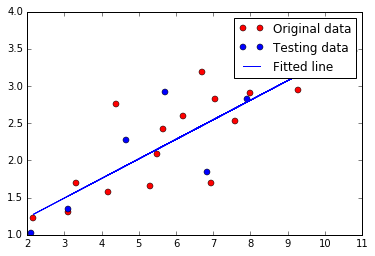

In [49]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for(x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

            
    # Display logs per epoch step
    if epoch % display_step == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)
            
    print "Optimization Done!"
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print "training cost: ", training_cost, " W= ", sess.run(W), " b= ", sess.run(b)
        
            # Testing example, as requested (Issue #2)
    test_X = np.asarray([6.83,4.668,8.9,7.91,5.7,8.7,3.1,2.1])
    test_Y = np.asarray([1.84,2.273,3.2,2.831,2.92,3.24,1.35,1.03])

    print "Testing... (L2 loss Comparison)"
    testing_cost = sess.run(tf.reduce_sum(tf.pow(activation-Y, 2))/(2*test_X.shape[0]),
                            feed_dict={X: test_X, Y: test_Y}) #same function as cost above
    print "Testing cost=", testing_cost
    print "Absolute l2 loss difference:", abs(training_cost - testing_cost)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()